# Info
Name:  

    ORACLES_routine_4STAR

Purpose:  

    Compare the routine flights AOD from 4STAR as compared to climatology
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2016-11-08
    

# Prepare the python environment


In [2]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [5]:
import hdf5storage as hs

In [6]:
fp = 'C:\\Users\\sleblan2\\Research\\ORACLES\\'

# Load files

## 4STAR ict

In [7]:
s = hs.loadmat(fp+'/aod_ict/all_aod_ict.mat')

In [64]:
s.keys()

[u'AOD1040',
 u'AOD0532',
 u'AOD1020',
 u'AOD1627',
 u'AOD0606',
 u'AOD1559',
 u'AOD1064',
 u'fl_alt_6',
 u'AOD0620',
 u'Latitude',
 u'AOD0550',
 u'AOD0452',
 u'fl1',
 u'fl2',
 u'qual_flag',
 u'AOD0520',
 u'AOD0501',
 u'Longitude',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD0380',
 u'Start_UTC',
 u'days',
 u'AOD0781',
 u'fl_alt_18',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'GPS_Alt']

## MODIS climatology

In [6]:
fp

'C:\\Users\\sleblan2\\Research\\ORACLES\\'

In [8]:
m = sio.netcdf_file(fp+'data_other\\climatology\\mombl_oracles_routine_flight_NW-SE.nc')

In [66]:
m.variables

{'AODFM_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x187840f0>,
 'AOD_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18784198>,
 'CFTOTAL_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18788048>,
 'CFWATER_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18788358>,
 'LONGITUDE': <scipy.io.netcdf.netcdf_variable at 0x18811908>,
 'LWP_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18784518>,
 'NAME': <scipy.io.netcdf.netcdf_variable at 0x18784048>,
 'ND_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18784588>,
 'RE_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18784a90>,
 'TTOP_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18784908>}

In [9]:
m2 = sio.netcdf_file(fp+'data_other\\climatology\\mombl_oracles_routine_flight_NW-SE_all.nc')

In [67]:
m2.variables

{'AODFM_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18811128>,
 'AODFM_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x18811358>,
 'AOD_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x188110f0>,
 'AOD_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x18811320>,
 'CFTOTAL_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18811278>,
 'CFTOTAL_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x18811470>,
 'CFWATER_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x188112e8>,
 'CFWATER_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x188114a8>,
 'LONGITUDE': <scipy.io.netcdf.netcdf_variable at 0x186cb7f0>,
 'LWP_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18811208>,
 'LWP_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x18811438>,
 'NAME': <scipy.io.netcdf.netcdf_variable at 0x188110b8>,
 'ND_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18811198>,
 'ND_YRMEAN': <scipy.io.netcdf.netcdf_variable at 0x188113c8>,
 'RE_CLIMOMEAN': <scipy.io.netcdf.netcdf_variable at 0x18811160>,
 'RE_YRME

In [51]:
m2.variables['AOD_YRMEAN'].data

array([[[  4.45985824e-01,   3.16387504e-01,   4.47000027e-01,
           8.71484339e-01,   6.73612475e-01,   5.81343710e-01,
           6.06093705e-01,   7.24328101e-01,   4.81757790e-01,
           6.65496051e-01,   5.68125010e-01,   6.30671918e-01,
           4.47281301e-01],
        [  6.00991130e-01,   2.33999997e-01,   4.49828148e-01,
           5.96606255e-01,   9.68437493e-01,   4.23656255e-01,
           7.11187482e-01,   8.00290227e-01,   4.74393755e-01,
           7.59496868e-01,   6.33599997e-01,   6.27206206e-01,
           4.79400009e-01],
        [  6.49343789e-01,   3.15412521e-01,   4.47806269e-01,
           6.34007812e-01,   8.89218628e-01,   3.55612516e-01,
           1.10685265e+00,   7.81138361e-01,   5.31000018e-01,
           7.60229230e-01,   1.00565624e+00,   6.71687543e-01,
           8.14992189e-01],
        [  5.48212469e-01,   3.54000002e-01,   3.95793736e-01,
           7.72031248e-01,   7.11503863e-01,   4.88006204e-01,
           6.20156229e-01,   9.885

## MODIS AAC from Meyer for each day, subset by Meloe

Collocation method:
1.     routine flight track is made of 100 points  (i.e. straight line from 23ºS, 13ºE to 10ºS, 0ºE)
2.     I select the closest MODIS AAC data point (within 15km) to each of the N=100 pt on the routine flight track.
3.     MODIS AAC AODs are then averaged in each of Sam's longitude bins


Here’s a short description of the dataset (Kerry, please correct me if I’m wrong):
Combination of MODIS and TERRA AAC AOD, high-resolution 0.1 x 0.1º. Suggested quality filtering is applied. Parameter is "Above_Cloud_AOT_MOD04Abs" i.e retrievals assuming the MOD04 absorbing aerosol model rather than the Haywood/SAFARI-2000 model, which is what is used to create the near-real time retrieval imagery in the field for ORACLES.

In [10]:
import datetime

In [11]:
import load_utils as lu

In [12]:
aac = sio.loadmat(fp+'data_other\\MODIS_AAC\\MODIS_AAC_per_bin.mat')

In [18]:
aac['data_aac'][0,0].dtype.names

('Nperbin',
 'medianAODperbin',
 'meanAODperbin',
 'stdevAODperbin',
 'BinCenter',
 'Binlimits',
 'FlightDay')

In [13]:
daac = []

In [14]:
for i in xrange(len(aac['data_aac'][0,:])):
    print aac['data_aac'][0,i]['FlightDay'][0][0][0]
    daac.append(lu.recarray_to_dict(aac['data_aac'][0,i]))

A2016244
A2016248
A2016252
A2016254
A2016256
A2016269


In [15]:
# simplify the dict
for i in xrange(len(daac)):
    for k in daac[i].keys():
        daac[i][k] = daac[i][k][0,0]

In [16]:
for i in xrange(len(daac)):
    daac[i]['datetime'] = datetime.datetime.strptime(daac[i]['FlightDay'][0], 'A%Y%j')
    daac[i]['date'] = daac[i]['datetime'].strftime('%Y%m%d')
    print i,daac[i]['date']

0 20160831
1 20160904
2 20160908
3 20160910
4 20160912
5 20160925


# Subset for routine flight

In [17]:
d_rtn = ['20160831','20160904','20160908','20160910','20160912','20160925']

In [18]:
d_irtn = [2.0,4.0,6.0,7.0,8.0,13.0]

In [19]:
s['days'][0]

0.0

In [20]:
ff = []
for d in d_irtn:
    ff.append(s['days']==d)

In [21]:
for i,f in enumerate(ff):
    if i==0:
        fl = f[0]
    else:
        fl = fl | f

In [22]:
s['fl_rtn'] = fl & s['fl']

# Now plot the routine flight aods

## all points

<IPython.core.display.Javascript object>


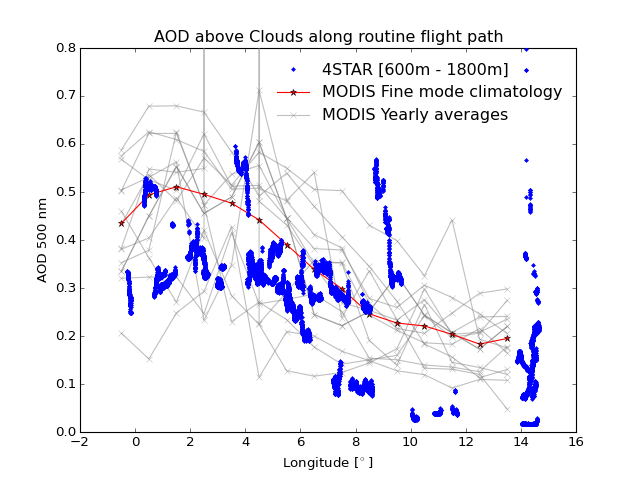

In [150]:
plt.figure()
plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',zorder=100)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.5,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.5,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.legend(numpoints=1,frameon=False)
plt.title('AOD above Clouds along routine flight path')
plt.savefig(fp+'plot\\Climat_AAC_4STAR_all_MODIS.png',transparent=True,dpi=600)

## heat map of points

<IPython.core.display.Javascript object>


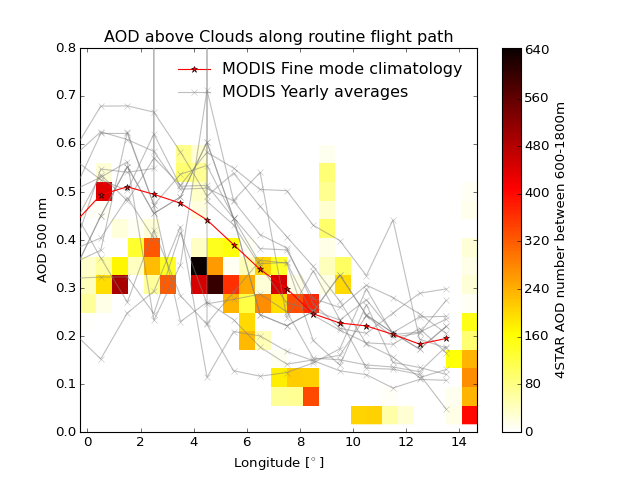

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [75]:
plt.figure()
cc = plt.hist2d(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],bins=25,cmap=plt.cm.hot_r)
cb = plt.colorbar()
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.5,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.5,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.legend(numpoints=1,frameon=False)
plt.title('AOD above Clouds along routine flight path')
cb.set_label('4STAR AOD number between 600-1800m')
plt.savefig(fp+'plot\\Climat_AAC_4STAR_hist_MODIS.png',transparent=True,dpi=600)

## Use bins from heat map to make box whisker plot

In [23]:
bins = []
pos = []
for i,c in enumerate(cc[1][0:-2]):
    lon_fl = (s['Longitude'][s['fl_rtn']]>=c)&(s['Longitude'][s['fl_rtn']]<cc[1][i+1])
    bins.append(s['AOD0501'][s['fl_rtn']][lon_fl])
    pos.append((c+cc[1][i+1])/2.0)

NameError: name 'cc' is not defined

In [24]:
def color_box(bp, color):

    # Define the elements to color. You can also add medians, fliers and means
    elements = ['boxes','caps','whiskers','medians','means','fliers']

    # Iterate over each of the elements changing the color
    for elem in elements:
        [plt.setp(bp[elem][idx], color=color) for idx in xrange(len(bp[elem]))]
    return

<IPython.core.display.Javascript object>


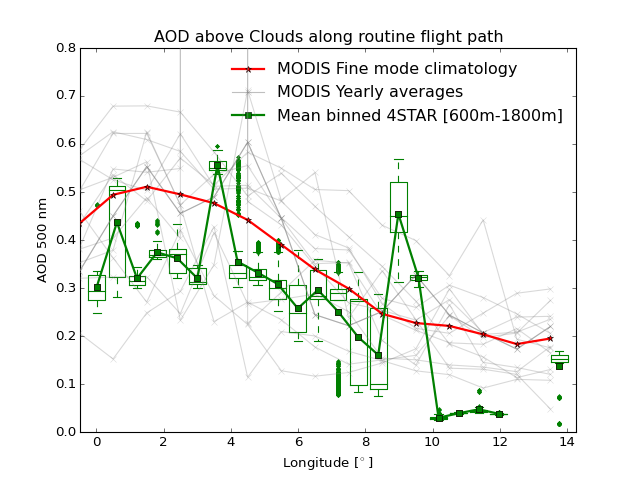

In [151]:
plt.figure()
#plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',
#         zorder=60,alpha=0.02,color='green')
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.5,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.3,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins,0,'g.',showmeans=True,positions=pos)
color_box(bo,'green')
#[plt.setp(bo['fliers'][idx],alpha=0.5,)for idx in xrange(len(bo['fliers']))]
plt.plot(pos,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box_MODIS.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


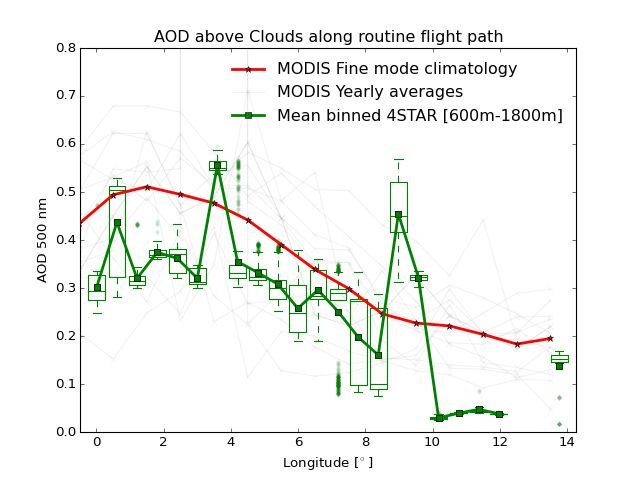

In [156]:
plt.figure()
#plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',
#         zorder=60,alpha=0.02,color='green')
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins,0,'g.',showmeans=True,positions=pos)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box_simpler_MODIS.png',transparent=True,dpi=600)

## Make another binning product, with less bins

<IPython.core.display.Javascript object>


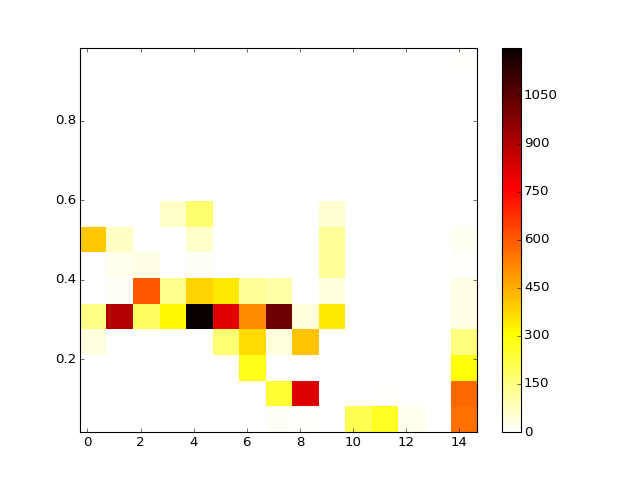

In [78]:
plt.figure()
cc2 = plt.hist2d(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],bins=15,cmap=plt.cm.hot_r)
cb = plt.colorbar()

In [25]:
bins2 = []
pos2 = []
for i,c in enumerate(cc2[1][0:-2]):
    lon_fl = (s['Longitude'][s['fl_rtn']]>=c)&(s['Longitude'][s['fl_rtn']]<cc2[1][i+1])
    bins2.append(s['AOD0501'][s['fl_rtn']][lon_fl])
    pos2.append((c+cc2[1][i+1])/2.0)

NameError: name 'cc2' is not defined

<IPython.core.display.Javascript object>


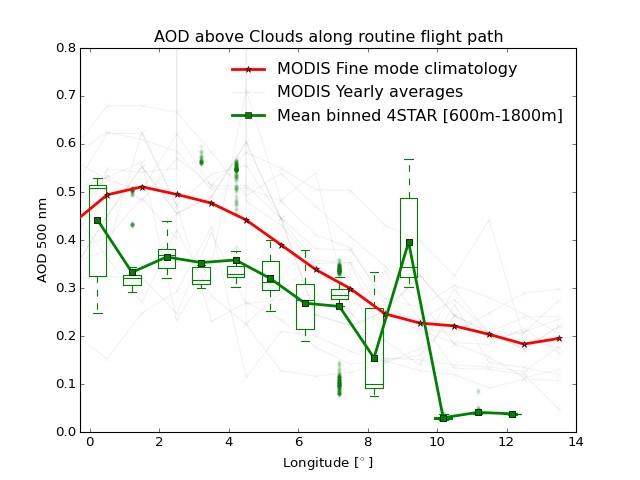

In [162]:
plt.figure()
#plt.plot(s['Longitude'][s['fl_rtn']],s['AOD0501'][s['fl_rtn']],'.',label='4STAR [600m - 1800m]',
#         zorder=60,alpha=0.02,color='green')
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins2,0,'g.',showmeans=True,positions=pos2)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos2,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box2_simpler_MODIS.png',transparent=True,dpi=600)

## Now try with same bins as MODIS

In [26]:
pos3 = m.variables['LONGITUDE'].data[0,:]

In [27]:
pos3

array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5], dtype=float32)

In [28]:
lims3 = pos3-0.5
lims3= np.append(lims3,pos3[-1]+0.5)

In [29]:
lims3

array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.])

In [30]:
bins3 = []
for i,c in enumerate(lims3[0:-1]):
    lon_fl = (s['Longitude'][s['fl_rtn']]>=c)&(s['Longitude'][s['fl_rtn']]<lims3[i+1])
    bins3.append(s['AOD0501'][s['fl_rtn']][lon_fl])

In [31]:
len(lims3)

16

In [32]:
len(bins3)

15

In [33]:
len(pos3)

15

<IPython.core.display.Javascript object>


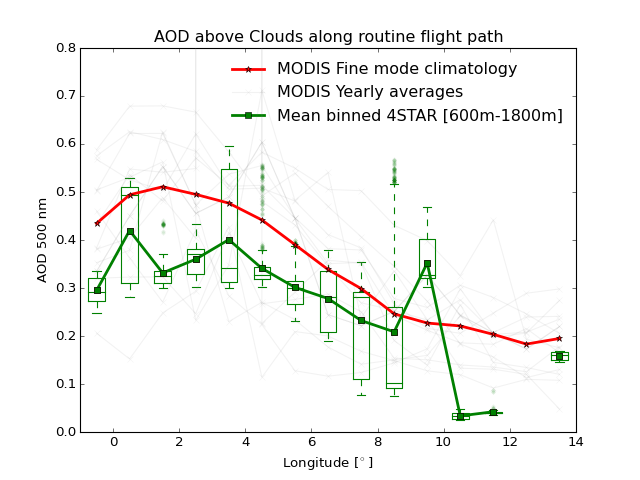

In [190]:
plt.figure()
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
bo = plt.boxplot(bins3,0,'g.',showmeans=True,positions=pos3)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)
plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_simpler_MODIS.png',transparent=True,dpi=600)

In [34]:
s['fl_alt12'] = (s['GPS_Alt']>=600)&(s['GPS_Alt']<1200)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [35]:
s['fl_alt12']

array([False, False, False, ..., False, False, False], dtype=bool)

In [36]:
s['fl_rtn_12'] = s['fl_alt12'] & s['fl_QA'] & fl

In [37]:
s['fl_rtn_12']

array([False, False, False, ..., False, False, False], dtype=bool)

In [38]:
bins3_12 = []
for i,c in enumerate(lims3[0:-1]):
    lon_fl = (s['Longitude'][s['fl_rtn_12']]>=c)&(s['Longitude'][s['fl_rtn_12']]<lims3[i+1])
    bins3_12.append(s['AOD0501'][s['fl_rtn_12']][lon_fl])

<IPython.core.display.Javascript object>


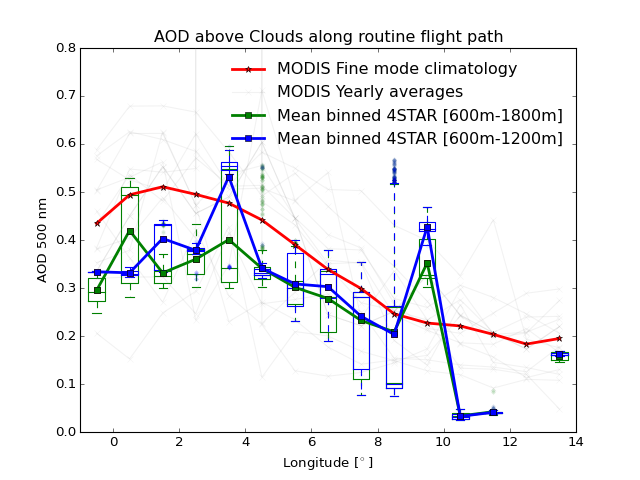

In [209]:
plt.figure()
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')

bo = plt.boxplot(bins3,0,'g.',showmeans=True,positions=pos3)
color_box(bo,'green')
[plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],'s-',zorder=100,color='green',label='Mean binned 4STAR [600m-1800m]',lw=2.5)

bo2 = plt.boxplot(bins3_12,0,'b.',showmeans=True,positions=pos3)
color_box(bo2,'blue')
[plt.setp(bo2['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
plt.plot(pos3,[a.get_ydata()[0] for a in bo2['means']],'s-',zorder=100,color='blue',label='Mean binned 4STAR [600m-1200m]',lw=2.5)

plt.legend(numpoints=1,frameon=False)
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_simpler_2alt_MODIS.png',transparent=True,dpi=600)

## make a plot day by day

In [39]:
d_irtn = [2.0,4.0,6.0,7.0,8.0,13.0]

In [40]:
flr2 = s['fl_rtn_12']&(s['days']==2.0)
flr4 = s['fl_rtn_12']&(s['days']==4.0)
flr6 = s['fl_rtn_12']&(s['days']==6.0)
flr7 = s['fl_rtn_12']&(s['days']==7.0)
flr8 = s['fl_rtn_12']&(s['days']==8.0)
flr13 = s['fl_rtn_12']&(s['days']==13.0)

In [41]:
fr2 = s['fl_rtn']&(s['days']==2.0)
fr4 = s['fl_rtn']&(s['days']==4.0)
fr6 = s['fl_rtn']&(s['days']==6.0)
fr7 = s['fl_rtn']&(s['days']==7.0)
fr8 = s['fl_rtn']&(s['days']==8.0)
fr13 = s['fl_rtn']&(s['days']==13.0)

In [42]:
fr = [fr2,fr4,fr6,fr7,fr8,fr13]
flr = [flr2,flr4,flr6,flr7,flr8,flr13]

In [43]:
cls = ['green','blue','yellow','cyan','magenta','orange']

In [44]:
d_rtn

['20160831', '20160904', '20160908', '20160910', '20160912', '20160925']

<IPython.core.display.Javascript object>


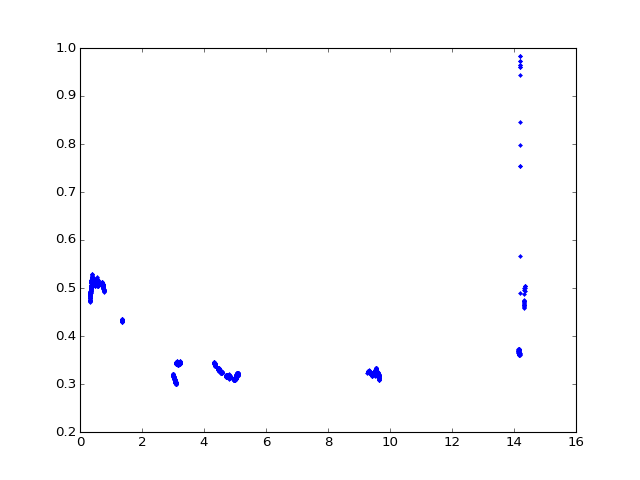

In [236]:
plt.figure()
plt.plot(s['Longitude'][f],s['AOD0501'][f],'.')

<IPython.core.display.Javascript object>


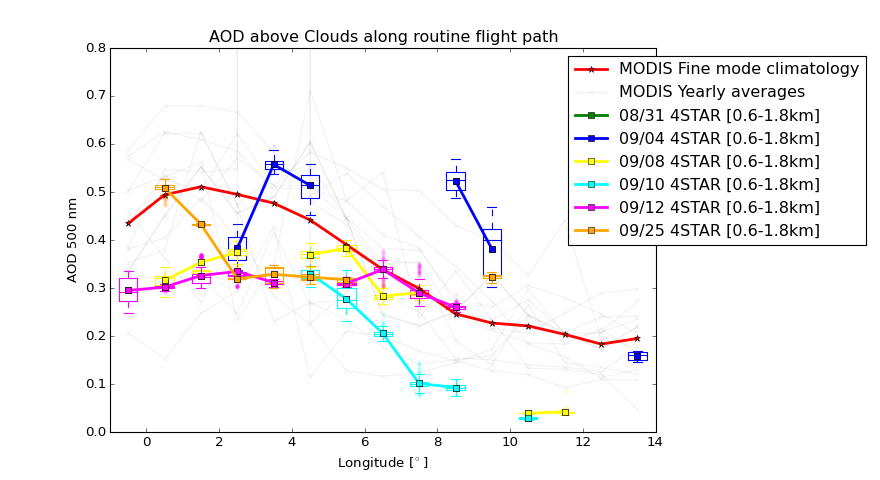

In [276]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')

for j,f in enumerate(fr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.8km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),lw=2.5)

plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_MODIS.png',transparent=True,dpi=600)

## Make an average from daily averages

<IPython.core.display.Javascript object>


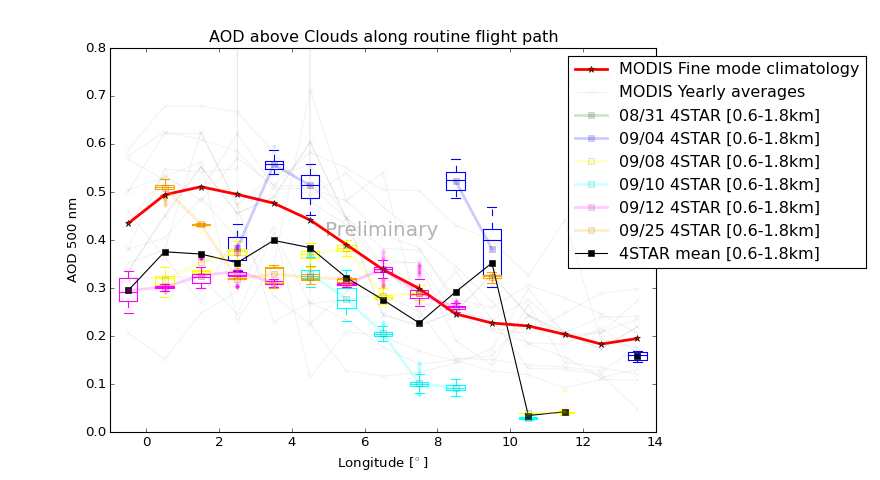

In [41]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
means = []

for j,f in enumerate(fr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.8km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
plt.text(0.5, 0.5, 'Preliminary',
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',label='4STAR mean [0.6-1.8km]')
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_avg_MODIS.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


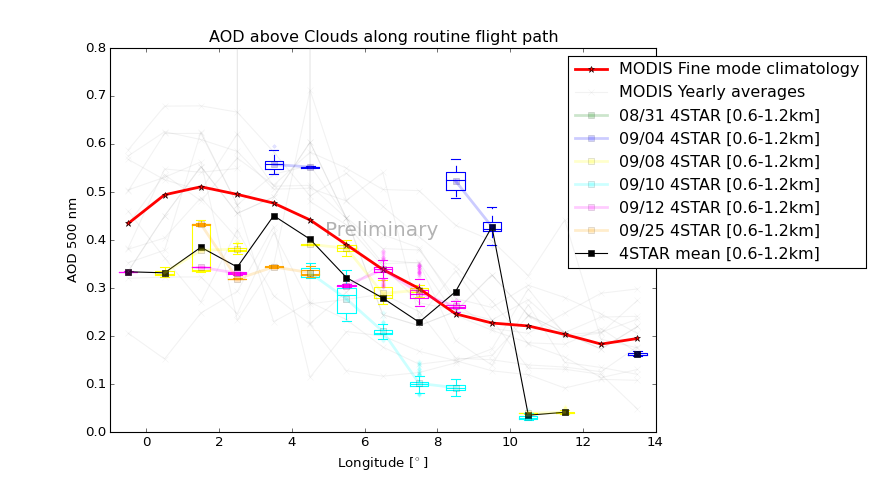

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [40]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
means = []

for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.2km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',label='4STAR mean [0.6-1.2km]')
plt.text(0.5, 0.5, 'Preliminary',
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_avg_12_MODIS.png',transparent=True,dpi=600)

## Redo plots for entire column 

In [45]:
s['fl_alt_6'] = (s['GPS_Alt']<=600)
s['fl_rtn_6'] = s['fl_alt_6'] & s['fl_QA'] & fl
flrr2 = s['fl_rtn_6']&(s['days']==2.0)
flrr4 = s['fl_rtn_6']&(s['days']==4.0)
flrr6 = s['fl_rtn_6']&(s['days']==6.0)
flrr7 = s['fl_rtn_6']&(s['days']==7.0)
flrr8 = s['fl_rtn_6']&(s['days']==8.0)
flrr13 = s['fl_rtn_6']&(s['days']==13.0)
flrr = [flrr2,flrr4,flrr6,flrr7,flrr8,flrr13]

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


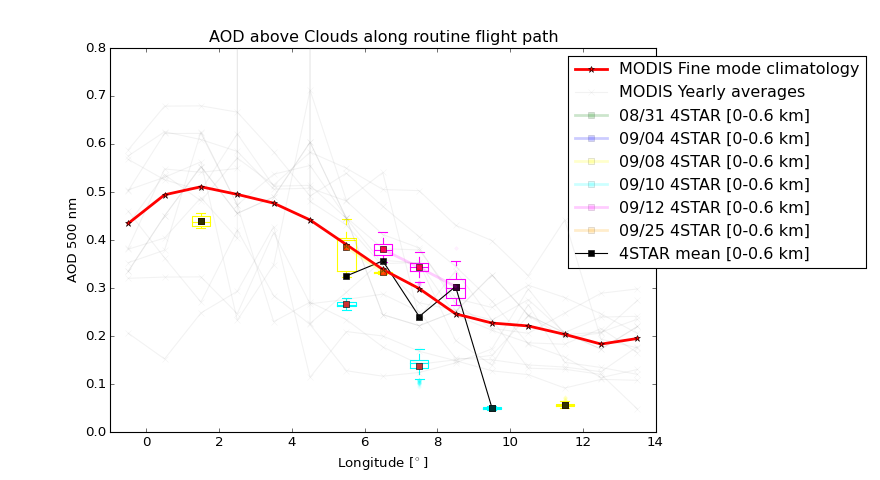

In [290]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above Clouds along routine flight path')
means = []

for j,f in enumerate(flrr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0-0.6 km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',label='4STAR mean [0-0.6 km]')
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.4,1.0))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.savefig(fp+'plot\\Climat_AAC_4STAR_box3_days_avg_surf_MODIS.png',transparent=True,dpi=600)

## Redo plots but with the MODIS AAC

In [46]:
daac[0].keys()

['Nperbin',
 'Binlimits',
 'FlightDay',
 'BinCenter',
 'stdevAODperbin',
 'datetime',
 'meanAODperbin',
 'medianAODperbin',
 'date']

In [113]:
a['meanAODperbin']

array([[        nan],
       [ 0.27288616],
       [ 0.36741648],
       [ 0.6649349 ],
       [ 0.78822035],
       [ 0.64348452],
       [ 0.7466085 ],
       [ 0.59415213],
       [ 0.65836475],
       [ 0.51449157],
       [ 0.37127293],
       [ 0.22403057],
       [ 0.07211777],
       [ 0.08792387],
       [ 0.14566176],
       [        nan]])

<IPython.core.display.Javascript object>


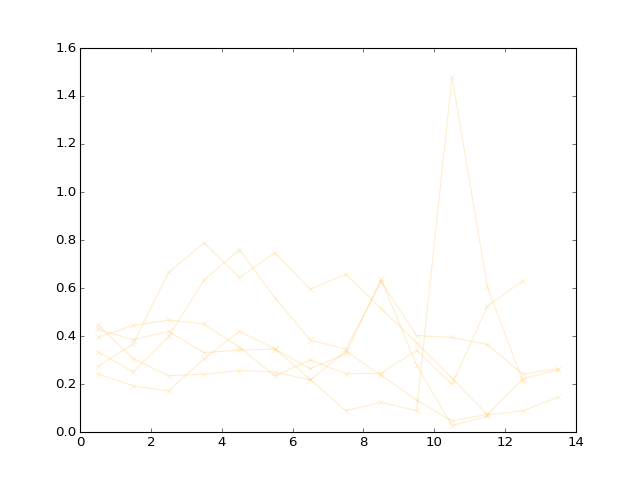

In [121]:
plt.figure()

for i,a in enumerate(daac):
   # print a['BinCenter'].shape,a['meanAODperbin'][0:-1].shape
   # print a['meanAODperbin']
    plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][0:-1],'x-',lw=1,color='orange',alpha=0.2)

In [1]:
np.nanmean(ac,axis=0).shape

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


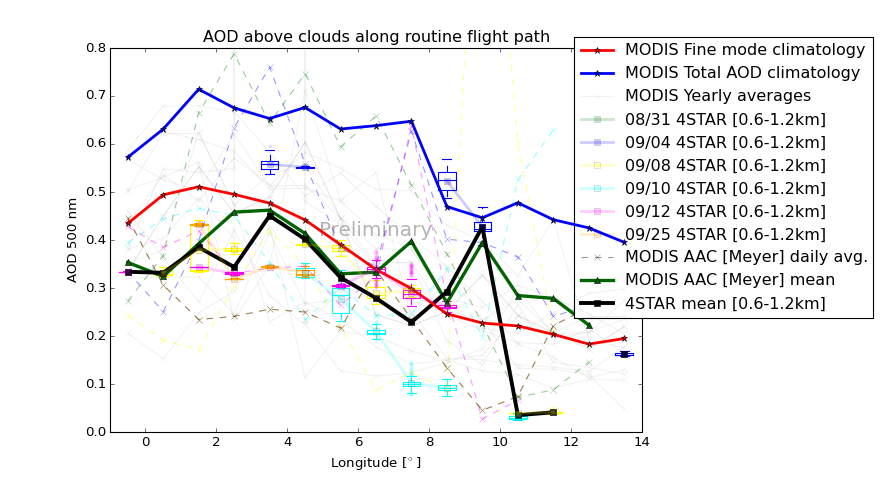

In [50]:
plt.figure(figsize=(11,6))
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine mode climatology',zorder=50,lw=2.5)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AOD_CLIMOMEAN'].data[0,:],
         '*-',color='b',label='MODIS Total AOD climatology',zorder=51,lw=2.5)
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,0],
         'x-',color='grey',alpha=0.1,zorder=10,label='MODIS Yearly averages')
plt.plot(m2.variables['LONGITUDE'].data[0,:],m2.variables['AODFM_YRMEAN'].data[0,:,:],'x-',color='grey',alpha=0.1,zorder=10)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)
plt.xlabel('Longitude [$^\\circ$]')
plt.title('AOD above clouds along routine flight path')
means = []

for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    #plt.plot(s['Longitude'][f],s['AOD0501'][f],'.',color=cls[j],alpha=0.02)
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's-',zorder=100,color=cls[j],label='{}/{} 4STAR [0.6-1.2km]'.format(d_rtn[j][4:6],d_rtn[j][6:8]),
             lw=2.5,alpha=0.2)    
    
ac = []
for i,a in enumerate(daac):
    plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x--',lw=1,color=cls[i],alpha=0.4)
    ac.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x--',lw=1,color='k',alpha=0.4,label='MODIS AAC [Meyer] daily avg.')
plt.plot(a['BinCenter'][0,:],np.nanmean(ac,axis=0),'^-',lw=3,color='darkgreen',label='MODIS AAC [Meyer] mean')
    
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',lw=3.5,label='4STAR mean [0.6-1.2km]')
plt.text(0.5, 0.5, 'Preliminary',
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
plt.legend(numpoints=1,frameon=True,bbox_to_anchor=(1.45,1.05))
ti = plt.gca().set_xticks([0,2,4,6,8,10,12,14])
tl = plt.gca().set_xticklabels([0,2,4,6,8,10,12,14])
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.78, box.height])

plt.savefig(fp+'plot\\MODIS_Climatology_vs_AAC_4STAR_and_Meyer_AAC.png',transparent=True,dpi=600)